# Air-Sea CO<sub>2</sub> fluxes

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import xarray as xr

import catalog
import util

xr.set_options(keep_attrs=True)

/glade/work/mclong/miniconda3/envs/_unison/lib/python3.7/site-packages/dask_jobqueue/core.py:20: FutureWarning: tmpfile is deprecated and will be removed in a future release. Please use dask.utils.tmpfile instead.
  from distributed.utils import tmpfile


In [3]:
# Parameters
case = 'smyle-fosi.regional.lat-range-basin.000'
component = 'pop'
stream = 'h'

n_workers = 32

In [4]:
# Parameters
component = "pop"
stream = "h"
n_workers = 32


In [5]:
assert component in ['pop']
assert stream in ['h', 'h.ecosys.nday1']

In [6]:
cluster, client = util.get_ClusterClient()
cluster.scale(n_workers)
client

/glade/work/mclong/miniconda3/envs/_unison/lib/python3.7/site-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 43112 instead
  f"Port {expected} is already in use.\n"


Connection method: Cluster object,Cluster type: dask_jobqueue.PBSCluster
Dashboard: https://jupyterhub.hpc.ucar.edu/stable/user/mclong/asm/proxy/43112/status,
Dashboard: https://jupyterhub.hpc.ucar.edu/stable/user/mclong/asm/proxy/43112/status,Workers: 0
Total threads: 0,Total memory: 0 B
Comm: tcp://10.12.206.63:45103,Workers: 0
Dashboard: https://jupyterhub.hpc.ucar.edu/stable/user/mclong/asm/proxy/43112/status,Total threads: 0
Started: Just now,Total memory: 0 B


In [7]:
dsets = catalog.to_dataset_dict(
    case=case,
    component=component,
    stream=stream,
)
dsets.keys()

dict_keys(['smyle-fosi.regional.lat-range-basin.000.pop.h'])

In [8]:
ds = dsets[f'{case}.{component}.{stream}']

In [9]:
dt_wgt = ds.time_bound.diff('d2').squeeze()
dt_wgt /= dt_wgt.sum()
dt_wgt

<xarray.DataArray 'time_bound' (time: 12)>
dask.array<truediv, shape=(12,), dtype=float64, chunksize=(1,), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 0347-01-16 12:00:00 ... 0347-12-16 12:00:00
Attributes:
    long_name:  boundaries for time-averaging interval
    units:      days since 0000-01-01 00:00:00

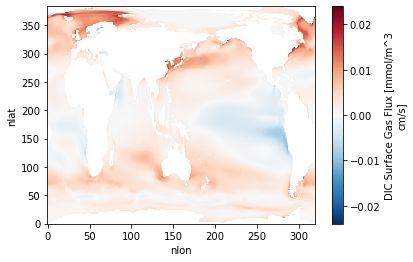

In [10]:
ds.FG_CO2.weighted(dt_wgt).mean('time').plot()